# **Statistics Lab 52568 - Lab 7**


Idan Keipour 315355537

Menachem Sokolik 314696972

Maria Mordvova 345232821

In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import statsmodels.api as sm
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure 
from functools import partialmethod 
from sklearn.preprocessing import normalize
import io
from sklearn import preprocessing



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to mount our local drive to the colab network

In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/menac/OneDrive/Desktop/52568 STATISTICS LAB/LAB2"

Running on CoLab
Mounted at /content/drive


In [ ]:
# Loading elections 2021 elections data - ballot:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2021.csv to votes per city 2021.csv
Saving votes per ballot 2020.csv to votes per ballot 2020.csv
Saving votes per city 2020.csv to votes per city 2020.csv


In [ ]:
df_2021_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_city_raw = df_2021_city_raw[df_2021_city_raw.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_2021_city = df_2021_city_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_city = df_2021_city[df_2021_city.columns[5:-1]] # removing "metadata" columns

df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[9:-1]] # removing "metadata" columns

parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

df_2020_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020
df_2020_city = df_2020_city_raw[df_2020_city_raw.columns[6:-1]] # removing "metadata" columns
df_2020_ballots_raw_ = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2020_ballots_ = df_2020_ballots_raw_.drop('סמל ועדה', axis=1) # new column added in Sep 2021


**Question1. Matching the ballots between the 2020 election and the 2021 election.**

# ***1.a***

In [ ]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]


***Data loading and normalization as requested in the question. Also, data correction as done in lab 6.***

---



In [ ]:
# for 2020

df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() # loading data of 2020

# Matching of the parties in the 2020 elections to the 2021 elections:
df_2020_ballots_raw['מרצ'] = round(df_2020_ballots_raw['אמת']/2)
df_2020_ballots_raw['אמת'] = round(df_2020_ballots_raw['אמת']/2)
df_2020_ballots_raw['עם'] = round(df_2020_ballots_raw['ודעם']*0.4)
df_2020_ballots_raw['ודעם'] = round(df_2020_ballots_raw['ודעם']*0.6)
df_2020_ballots_raw['ת'] = round(df_2020_ballots_raw['מחל']*0.167)
df_2020_ballots_raw['מחל'] = round(df_2020_ballots_raw['מחל']*0.833)
df_2020_ballots_raw['כן'] = round(df_2020_ballots_raw['פה']*0.333)
df_2020_ballots_raw['פה'] = round(df_2020_ballots_raw['פה']*0.667)
df_2020_ballots_raw['ב'] = round(df_2020_ballots_raw['טב']*0.6)
df_2020_ballots_raw['ט'] = round(df_2020_ballots_raw['טב']*0.4 + df_2020_ballots_raw['נץ'])

df_2020_ballots_raw.iloc[:,10:]= df_2020_ballots_raw.iloc[:,10:].div(df_2020_ballots_raw.iloc[:,10:].sum(axis=1), axis= 0) # normolaize

df_2020_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020
df_2020_city_raw['מרצ'] = round(df_2020_city_raw['אמת']/2)
df_2020_city_raw['אמת'] = round(df_2020_city_raw['אמת']/2)
df_2020_city_raw['עם'] = round(df_2020_city_raw['ודעם']*0.4)
df_2020_city_raw['ודעם'] = round(df_2020_city_raw['ודעם']*0.6)
df_2020_city_raw['ת'] = round(df_2020_city_raw['מחל']*0.167)
df_2020_city_raw['מחל'] = round(df_2020_city_raw['מחל']*0.833)
df_2020_city_raw['כן'] = round(df_2020_city_raw['פה']*0.333)
df_2020_city_raw['פה'] = round(df_2020_city_raw['פה']*0.667)
df_2020_city_raw['ב'] = round(df_2020_city_raw['טב']*0.6)
df_2020_city_raw['ט'] = round(df_2020_city_raw['טב']*0.4 + df_2020_city_raw['נץ'])

df_2020_city_raw.iloc[:,6:] = df_2020_city_raw.iloc[:,6:].div(df_2020_city_raw.iloc[:,6:].sum(axis=1), axis= 0) # normolaize

# for 2021

df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() # loading data of 2021
df_2021_ballots_raw.iloc[:,10:]= df_2021_ballots_raw.iloc[:,10:].div(df_2021_ballots_raw.iloc[:,10:].sum(axis=1), axis= 0) # normolaize

df_2021_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_city_raw = df_2021_city_raw[df_2021_city_raw.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_2021_city_raw.iloc[:,6:] = df_2021_city_raw.iloc[:,6:].div(df_2021_city_raw.iloc[:,6:].sum(axis=1), axis= 0) # normolaize

# Total voting for parties that passed the blocking percentage
total_votes_2021 = parties_votes_percents(df_2021_city, 0.035) 
names_2021 = total_votes_2021.keys() 

df_2020_ballots = df_2020_ballots_raw[names_2021]
df_2020_ballots = pd.concat([df_2020_ballots_raw[["סמל ישוב", "קלפי", "בזב", "כשרים"]],df_2020_ballots], axis=1, join="inner").reset_index()
df_2021_ballots = df_2021_ballots_raw[names_2021]
df_2021_ballots = pd.concat([df_2021_ballots_raw[["סמל ישוב", "קלפי", "בזב", "כשרים"]],df_2021_ballots], axis=1, join="inner").reset_index()

***Consolidation of data files, and compensation by year.***

---


In [ ]:
merged_df = df_2020_ballots.set_index(['קלפי', 'סמל ישוב']).join(df_2021_ballots.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-2020').dropna()
ballots_2020 = merged_df[merged_df.columns[0:16]]
ballots_2021 = merged_df[merged_df.columns[16:32]]
ballots_2020.columns = ballots_2021.columns
ballots_2021.iloc[:, 1:3] = ballots_2021.iloc[:, 1:3].astype(int) #Keeping the parties that passed the blocking percentage in the 2021 elections
ballots_2021.rename(columns=parties_dict_2021, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# ***1.b.i***

***For 2021: getting the cities that low form 50000.***

---

In [ ]:
city_low_from_50000_2021 = df_2021_city_raw[(df_2021_city_raw['בזב'] <= 50000)]

ballots_2021_new = df_2021_ballots[df_2021_ballots["שם ישוב"].isin(city_low_from_50000_2021.index)==True]
ballots_2021_new.rename(columns=parties_dict_2021, inplace=True)
ballots_2021_new = ballots_2021_new.sort_values(by=["שם ישוב"]).set_index("שם ישוב")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


***Receiving the ten polling stations with the largest square difference.***

***Use the cities file to create an average of polls by city (if not mathematically identical but gives similar results - Or Tzuk, confirmed the use of the question forum.)***

---


***Calculation of the quadratic difference by subtracting matrices.
We first calculated matrices for the mean which was also entered according to the number of ballots and the locality symbol. A second matrix is ​​the list of polling stations (this is how the same dimensions are created).***

---

In [ ]:
averge_2021 = city_low_from_50000_2021[names_2021]
averge_2021.rename(columns=parties_dict_2021, inplace=True)
averge_2021 = pd.concat([df_2021_city_raw[["סמל ישוב", "בזב", "כשרים"]],averge_2021], axis=1, join="inner")

averge_2021_by_cities = pd.DataFrame()
for i in range(len(ballots_2021_new.index)):
  averge_2021_by_cities = averge_2021_by_cities.append(averge_2021[averge_2021.index.isin([ballots_2021_new.index[i]])==True],ignore_index=False)

top_ten_2021 = pd.DataFrame(((ballots_2021_new.iloc[:,4:]-averge_2021_by_cities.iloc[:,3:])**2).sum(axis=1)).sort_values(by=["שם ישוב"])
top_ten_2021.columns =  ['הפרש ריבועי']
top_ten_2021 = pd.concat([ballots_2021_new[['קלפי', 'סמל ישוב']], top_ten_2021], axis=1).nlargest(10, 'הפרש ריבועי')
top_2021 = pd.MultiIndex.from_frame(top_ten_2021.iloc[:,0:2])
top_2021

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MultiIndex([(28.3, 1061),
            (11.0, 1063),
            (14.1, 1063),
            (37.0, 6700),
            ( 1.3,  874),
            (17.3, 1061),
            (62.0, 7600),
            (38.0, 2630),
            (26.1, 1063),
            (24.0, 1061)],
           names=['קלפי', 'סמל ישוב'])

# ***1.b.ii***

***The same for 2020.***

***For 2020: getting the cities that low form 50000.***

---

In [ ]:
city_low_from_50000_2020 = df_2020_city_raw[(df_2020_city_raw['בזב'] <= 50000)]

ballots_2020_new = df_2020_ballots[df_2020_ballots["שם ישוב"].isin(city_low_from_50000_2021.index)==True]
ballots_2020_new.rename(columns=parties_dict_2021, inplace=True)
ballots_2020_new = ballots_2020_new.sort_values(by=["שם ישוב"]).set_index("שם ישוב")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
averge_2020 = city_low_from_50000_2020[names_2021]
averge_2020.rename(columns=parties_dict_2021, inplace=True)
averge_2020 = pd.concat([df_2020_city_raw[["סמל ישוב", "בזב", "כשרים"]],averge_2020], axis=1, join="inner")

averge_2020_by_cities = pd.DataFrame()
for i in range(len(ballots_2020_new.index)):
  averge_2020_by_cities = averge_2020_by_cities.append(averge_2020[averge_2020.index.isin([ballots_2020_new.index[i]])==True],ignore_index=False)

top_ten_2020 = pd.DataFrame(((ballots_2020_new.iloc[:,4:]-averge_2020_by_cities.iloc[:,3:])**2).sum(axis=1)).sort_values(by=["שם ישוב"])
top_ten_2020.columns = ['הפרש ריבועי']
top_ten_2020 = pd.concat([ballots_2020_new[['קלפי', 'סמל ישוב']], top_ten_2020], axis=1).nlargest(10, 'הפרש ריבועי')
top_2020 = pd.MultiIndex.from_frame(top_ten_2020.iloc[:,0:2])
top_2020

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MultiIndex([(13.0, 2034),
            (23.0, 2630),
            (17.2, 1061),
            (10.4, 8000),
            (26.0, 6700),
            ( 8.0,  874),
            (19.0, 2630),
            (33.0, 1063),
            ( 8.0, 1063),
            (18.0, 3730)],
           names=['קלפי', 'סמל ישוב'])

#***1.c***

***Finding the 10 polling stations for which the sum of the square distances between the turnout and the 13 parties
The major in the 2020 election The 2021 election was maximal.***

---

In [ ]:
largest_dif = ((ballots_2021.drop(['שם ישוב','כשרים','בזב'],axis=1) - ballots_2020.drop(['שם ישוב','כשרים','בזב'],axis=1))**2).sum(axis=1).nlargest(10).index
largest_dif

MultiIndex([(1.0, 1296),
            (1.0, 4501),
            (1.0,  695),
            (2.0,   72),
            (1.0,  648),
            (1.0,  777),
            (2.0, 4501),
            (1.0, 1259),
            (1.0,  417),
            (1.0, 1209)],
           names=['קלפי', 'סמל ישוב'])

# ***1.e***


***Finding the 10 polling stations where the overall turnout (average over the 2 election campaigns) was maximum.***

---

In [ ]:
index_both = ballots_2021.index #all the ballots which in both of the elections
nc_df_2021 = df_2021_ballots_raw.set_index(['קלפי', 'סמל ישוב']).loc[pd.IndexSlice[index_both]] #Not clean data of 2021
nc_df_2020 = df_2020_ballots_raw.set_index(['קלפי', 'סמל ישוב']).loc[pd.IndexSlice[index_both]] #Not clean data of 2020
nc_df_2021.drop(nc_df_2021.loc[nc_df_2021['בזב']==0].index, inplace=True) #remove ballots with 0 בזב
nc_df_2020.drop(nc_df_2020.loc[nc_df_2020['בזב']==0].index, inplace=True) #remove ballots with 0 בזב

In [ ]:
nc_df_2021['אחוז הצבעה'] = nc_df_2021['מצביעים'] / nc_df_2021['בזב']
nc_df_2020['אחוז הצבעה'] = nc_df_2020['מצביעים'] / nc_df_2020['בזב']
avg_vote_percent = ((nc_df_2021['אחוז הצבעה'] + nc_df_2020['אחוז הצבעה'])/2).nlargest(10).index
avg_vote_percent

MultiIndex([( 1.0,  440),
            ( 1.0, 1365),
            ( 1.0, 1065),
            ( 1.0, 3822),
            ( 1.0, 1371),
            ( 1.0, 1369),
            ( 1.0, 3777),
            (11.0,  922),
            ( 1.0, 3724),
            (20.2, 3730)],
           names=['קלפי', 'סמל ישוב'])

#***1.f***

***Findןמע the 10 polling stations where there is the largest change in the overall turnout between the 2 election campaigns.***

---

In [ ]:
index_both = ballots_2021.index #all the ballots which in both of the elections
nc_df_2021 = df_2021_ballots_raw.set_index(['קלפי', 'סמל ישוב']).loc[pd.IndexSlice[index_both]] #Not clean data of 2021
nc_df_2020 = df_2020_ballots_raw.set_index(['קלפי', 'סמל ישוב']).loc[pd.IndexSlice[index_both]] #Not clean data of 2020

nc_df_2021['אחוז הקולות הפסולים'] = nc_df_2021['פסולים'] / nc_df_2021['מצביעים']
nc_df_2020['אחוז הקולות הפסולים'] = nc_df_2020['פסולים'] / nc_df_2020['מצביעים']
avg_invalid_percent = ((nc_df_2021['אחוז הקולות הפסולים'] + nc_df_2020['אחוז הקולות הפסולים'])/2).nlargest(10).index
avg_invalid_percent

MultiIndex([( 71.1, 9000),
            (488.0, 3000),
            ( 52.0, 2710),
            ( 59.0, 1061),
            (  1.0,  102),
            (  3.0,  521),
            ( 21.0, 9600),
            ( 19.0, 1061),
            ( 37.0, 7600),
            (  1.0,  942)],
           names=['קלפי', 'סמל ישוב'])

#***1. i***

***On the basis of solutions of laboratories 4 and 5. There I learned that it is possible to do so a loop for plots.***

---

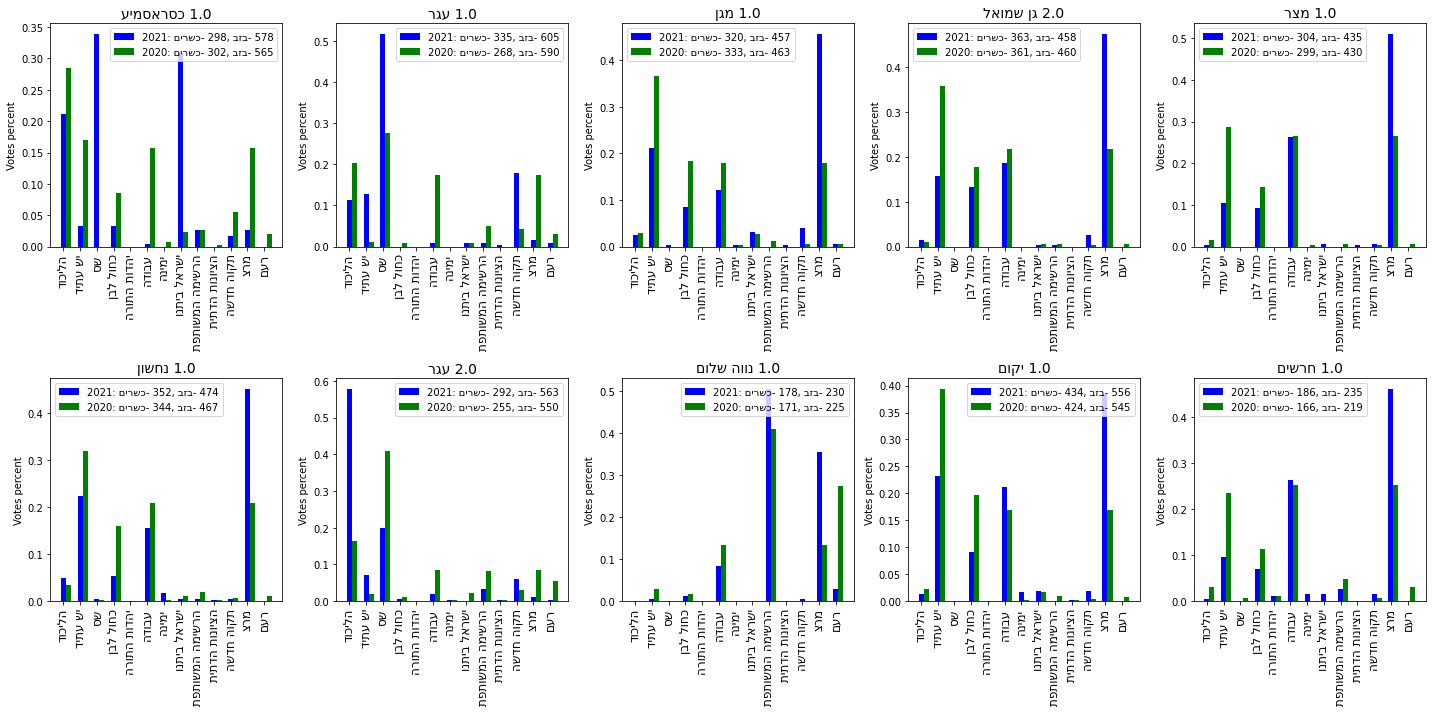

In [ ]:
def bar_plot(ballots_2020, ballots_2021, top):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  votes_2020 = ballots_2020.loc[top]  # total votes for each party
  votes_2021 = ballots_2021.loc[top]

  names = votes_2020.iloc[:,3:].keys()
  rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
  n = 13

  for i in range(10):
    bar_2020 = ax[i//5, i%5].bar(np.arange(n)+width, list(votes_2020.iloc[i,3:]), width, color='g')
    bar_2021 = ax[i//5, i%5].bar(np.arange(n), list(votes_2021.iloc[i,3:]), width, color='b')
    ax[i//5, i%5].set_title(ballots_2020.loc[top[i], 'שם ישוב'][::-1] + " " + str(top[i][0]) , fontsize=14)

    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 90 ,fontsize=12)
    ax[i//5, i%5].legend((bar_2021[0], bar_2020[0]), ('2021: ' + 'םירשכ- '+ str(ballots_2021.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots_2021.loc[top[i], 'בזב']),
                                                      '2020: ' + 'םירשכ- '+ str(ballots_2020.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots_2020.loc[top[i], 'בזב'])))

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()

bar_plot(ballots_2020, ballots_2021, largest_dif)

***The plots above for section c***

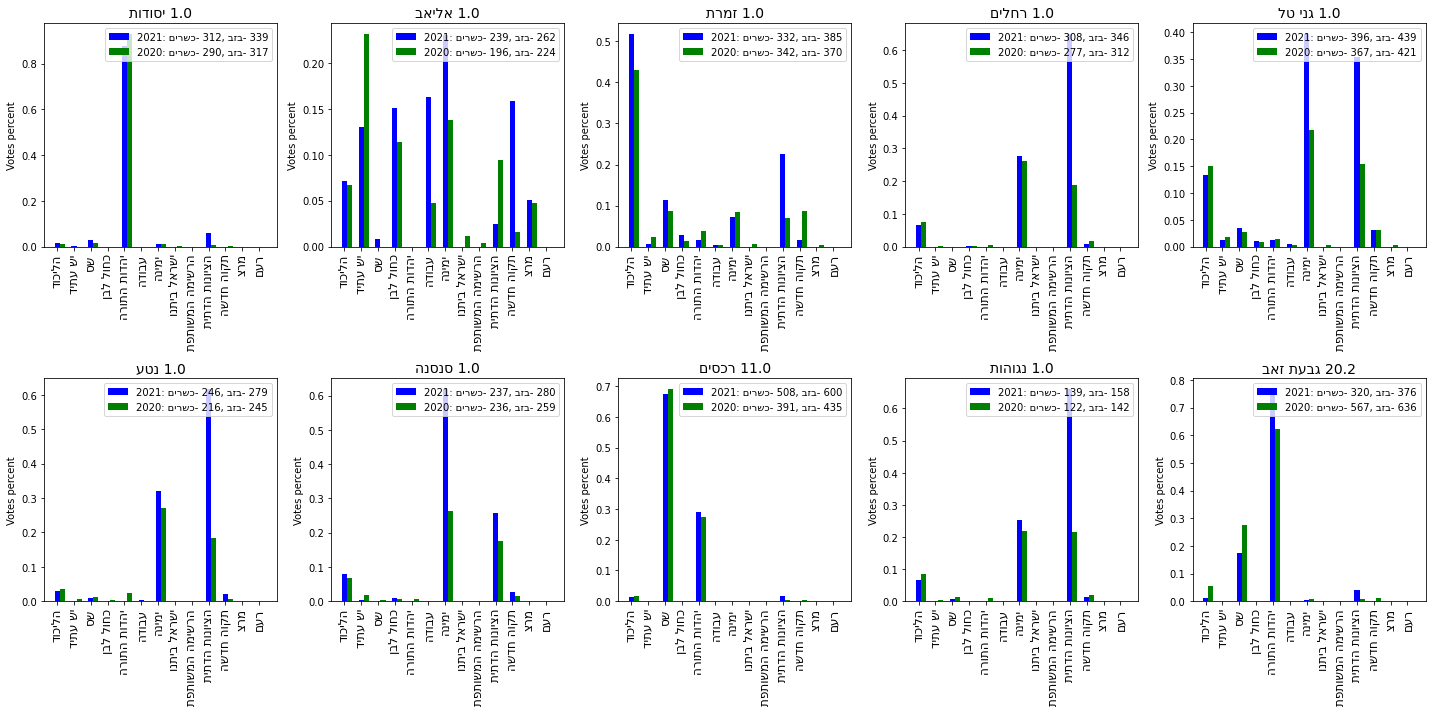

In [ ]:
bar_plot(ballots_2020, ballots_2021, avg_vote_percent)

***The plots above for section e***

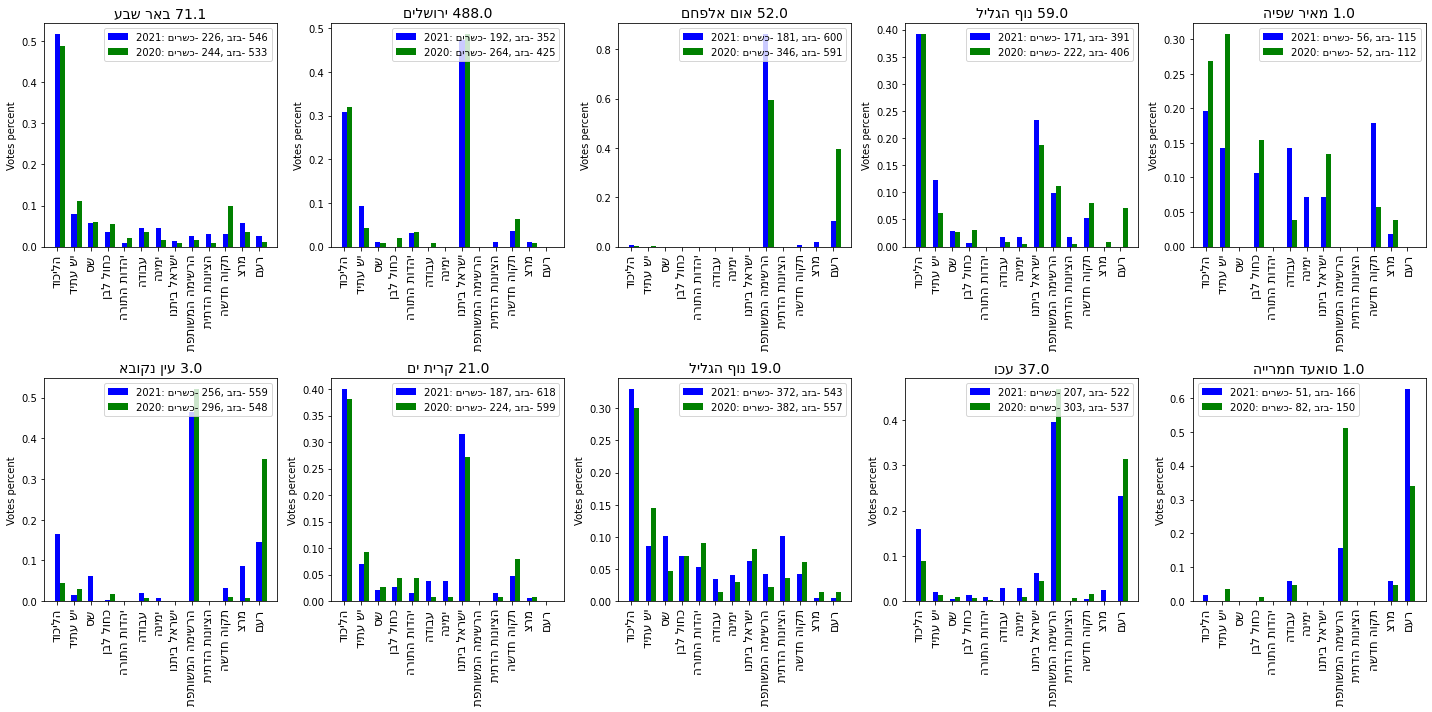

In [ ]:
bar_plot(ballots_2020, ballots_2021, avg_invalid_percent)

***The plots above for section f***

***Many changes can be seen in the nature of voting between 2020 and 2021.
These changes may indicate the nature of the changes in the parties during the election or the possibility of suspicious ballots.
According to the methods of years at a time, the nature of the method should each time correct the accuracy in order to identify frequent anomalies between the two election campaigns.
If we look closely, it seems that there is a difference in the amount of "בזב" or in the "kosher" votes.
Sometimes there is less "בזב" than in the previous year, which indicates that additional ballots may have been added in the place that decreased in the data union because it did not exist in 2020, which explains the decrease in "בזב" and the difference in the distribution of votes.***


***For 1.b. 2020 and 2021***

---

In [ ]:
ballots_2020_for_f = ballots_2020_new.reset_index()
ballots_2020_for_f = ballots_2020_for_f.set_index(["קלפי", "סמל ישוב"]).dropna()

averge_2020_for_f = pd.DataFrame()
for i in range(len(top_ten_2020.index.to_list())):
  averge_2020_for_f = averge_2020_for_f.append(averge_2020[averge_2020.index.isin([top_ten_2020.index.to_list()[i]])==True],ignore_index=False)
averge_2020_for_f = averge_2020_for_f.set_index("סמל ישוב").sort_index()

ballots_2021_for_f = ballots_2021_new.reset_index()
ballots_2021_for_f = ballots_2021_for_f.set_index(["קלפי", "סמל ישוב"]).dropna()

averge_2021_for_f = pd.DataFrame()
for i in range(len(top_ten_2021.index.to_list())):
  averge_2021_for_f = averge_2021_for_f.append(averge_2021[averge_2021.index.isin([top_ten_2021.index.to_list()[i]])==True],ignore_index=False)
averge_2021_for_f = averge_2021_for_f.set_index("סמל ישוב").sort_index()

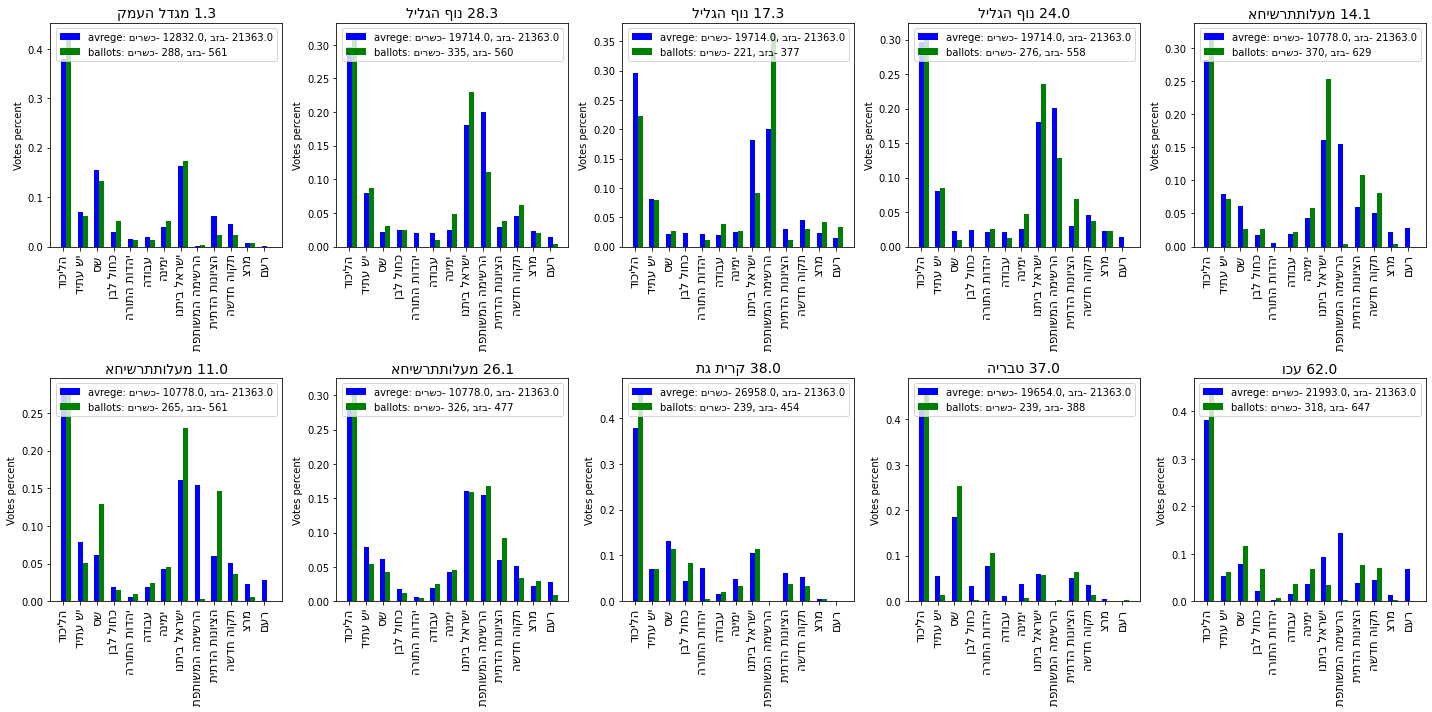

In [ ]:
def bar_plot_compare_to_avrege(ballots, averge, top):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  ballots = ballots[ballots.index.isin(top)].sort_values(["סמל ישוב"])
  averge = averge

  names = ballots.iloc[:,3:].keys()
  rev_names = [name[::-1] for name in list(names)]
  n = 13

  for i in range(10):
    ballots_bar = ax[i//5, i%5].bar(np.arange(n)+width, list(ballots.iloc[i,3:]), width, color='g')
    averge_bar = ax[i//5, i%5].bar(np.arange(n), list(averge.iloc[i,2:]), width, color='b')
    ax[i//5, i%5].set_title(ballots.iloc[i,0:1][0][::-1] + " " + str(ballots.index[i][0]) , fontsize=14)
    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 90 ,fontsize=12)
    ax[i//5, i%5].legend((averge_bar[0], ballots_bar[0]), ('avrege: ' + 'םירשכ- '+ str(averge.iloc[i,1:2][0]) + ', בזב- ' + str(averge.iloc[0,0:1][0]),
                                                           'ballots: ' + 'םירשכ- '+ str(ballots.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots.loc[top[i], 'בזב'])))

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()

bar_plot_compare_to_avrege(ballots_2021_for_f,averge_2021_for_f, top_2021)

***The plots above for section 1.b.i (2021)***

***It can be observed that according to the change in the distribution of votes at the polls which is different from the average in the city raises suspicion, which requires examination, as there are areas in the city that are more likely to vote for certain parties than other parts of the city.***

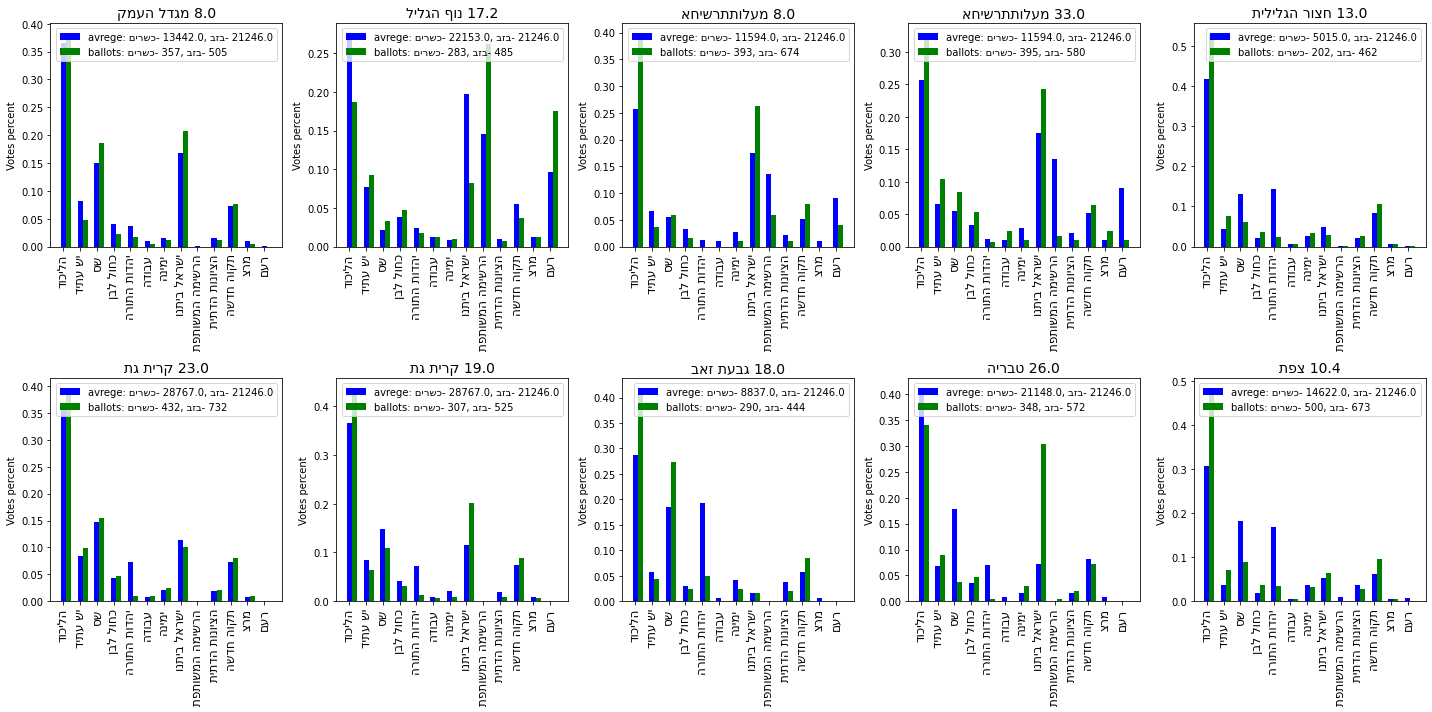

In [ ]:
bar_plot_compare_to_avrege(ballots_2020_for_f,averge_2020_for_f, top_2020)

***The plots above for section 1.b.i (2021)***



***It can be observed that according to the change in the distribution of votes at the polls which is different from the average in the city raises suspicion, which requires examination, as there are areas in the city that are more likely to vote for certain parties than other parts of the city.***

# ***Question 2***

# ***2.a***

***heatmap of corr***

In [ ]:
 from sklearn.covariance import empirical_covariance

 def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    plt.xticks(rotation = 90)
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

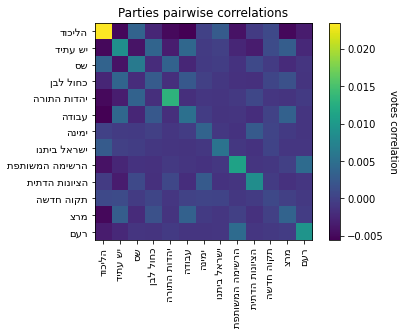

In [ ]:
df_2021 = ballots_2021.set_index("שם ישוב")
covv = empirical_covariance(df_2021.iloc[:,2:])
heatmap_corr(covv,df_2021.iloc[:,2:].columns)

***The heatmeap shows the correlation between the parties, from the high values ​​diagonally we can see that some votes have moved from one party to another.***

***Create the mahalanobis***

---

In [ ]:
import scipy as stats

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - data
    #x_mu = x - np.mean(data)
#    if not cov:
#        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    mahal = np.sqrt(mahal)
    return mahal.diagonal()


# ***2.b.i***

***2.b: repeat section 1.b for mahalanobis distance.***

---

In [ ]:
df_2021_for_mahalanobis = ballots_2021_new

#create new column in dataframe that contains Mahalanobis distance for each row
df_2021_for_mahalanobis['mahalanobis'] = mahalanobis(x= df_2021_for_mahalanobis.iloc[:,4:], data= averge_2021_by_cities.iloc[:,3:],cov=covv)

top_2021_of_mahalanobis = df_2021_for_mahalanobis.nlargest(10,"mahalanobis")
top_mahalanobis_2021 = pd.MultiIndex.from_frame(top_2021_of_mahalanobis[["קלפי", "סמל ישוב"]])
top_mahalanobis_2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


MultiIndex([(21.3, 1161),
            (21.2, 1161),
            (21.4, 1161),
            ( 9.1,  975),
            ( 3.2, 1296),
            (11.1,  509),
            (21.1, 1161),
            ( 9.3,  975),
            ( 3.1,  525),
            (90.0, 2200)],
           names=['קלפי', 'סמל ישוב'])

In [ ]:
df_2020_for_mahalanobis = ballots_2020_new


#create new column in dataframe that contains Mahalanobis distance for each row
df_2020_for_mahalanobis['mahalanobis'] = mahalanobis(x= df_2020_for_mahalanobis.iloc[:,4:], data= averge_2020_by_cities.iloc[:,3:],cov=covv)

top_2020_of_mahalanobis = df_2020_for_mahalanobis.nlargest(10,"mahalanobis")
top_mahalanobis_2020 = pd.MultiIndex.from_frame(top_2020_of_mahalanobis[["קלפי", "סמל ישוב"]])
top_mahalanobis_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


MultiIndex([(19.0, 3616),
            (44.0, 3616),
            (20.0, 3616),
            (13.0, 1015),
            (31.0, 1063),
            ( 7.0, 3640),
            ( 1.2,  681),
            (12.0,  831),
            ( 1.1,  681),
            (17.0, 1063)],
           names=['קלפי', 'סמל ישוב'])

In [ ]:
averge_2020_for_f_mahalanobis = pd.DataFrame()
for i in range(len(top_ten_2020.index.to_list())):
  averge_2020_for_f_mahalanobis = averge_2020_for_f_mahalanobis.append(averge_2020[averge_2020.index.isin([top_2020_of_mahalanobis.index.to_list()[i]])==True],ignore_index=False)
averge_2020_for_f_mahalanobis = averge_2020_for_f_mahalanobis.set_index("סמל ישוב").sort_index()


averge_2021_for_f_mahalanobis = pd.DataFrame()
for i in range(len(top_ten_2021.index.to_list())):
  averge_2021_for_f_mahalanobis = averge_2021_for_f_mahalanobis.append(averge_2021[averge_2021.index.isin([top_2021_of_mahalanobis.index.to_list()[i]])==True],ignore_index=False)
averge_2021_for_f_mahalanobis = averge_2021_for_f_mahalanobis.set_index("סמל ישוב").sort_index()

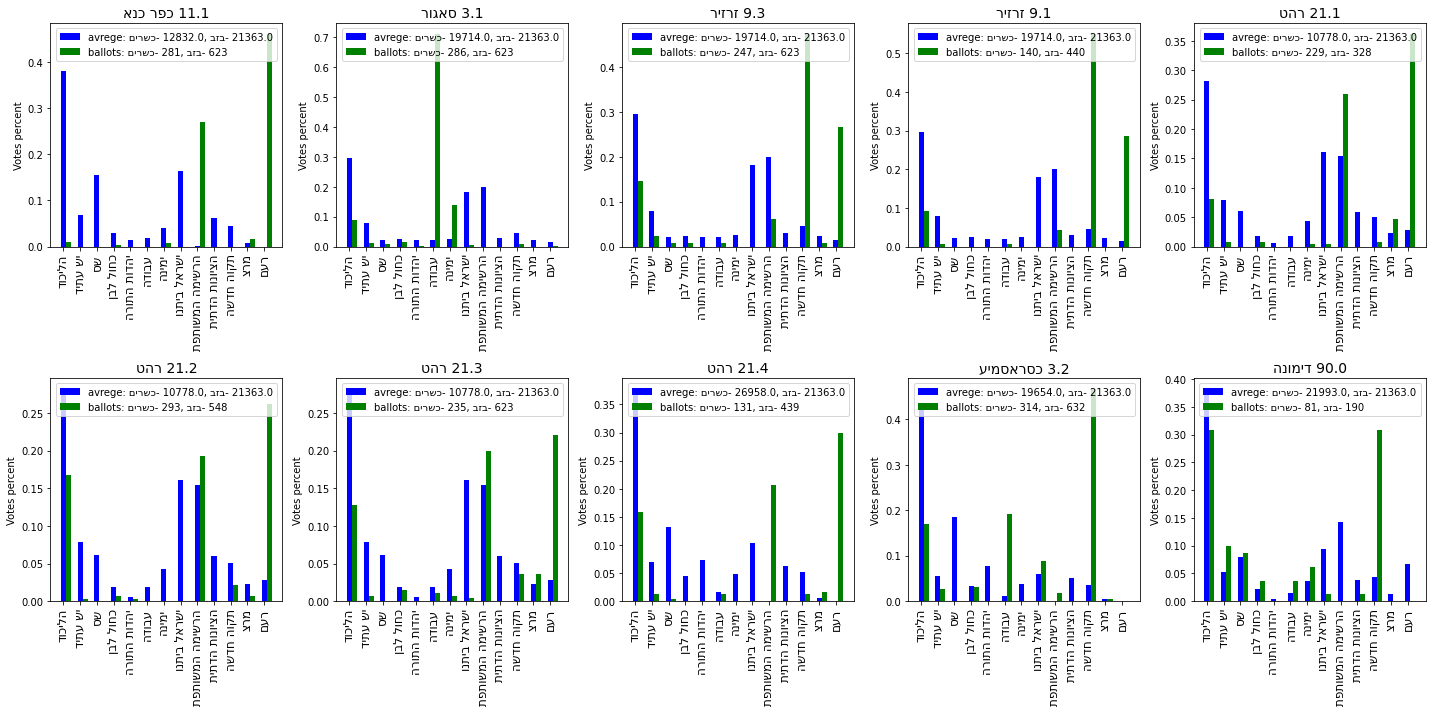

In [ ]:
bar_plot_compare_to_avrege(ballots_2021_for_f,averge_2021_for_f, top_mahalanobis_2021)

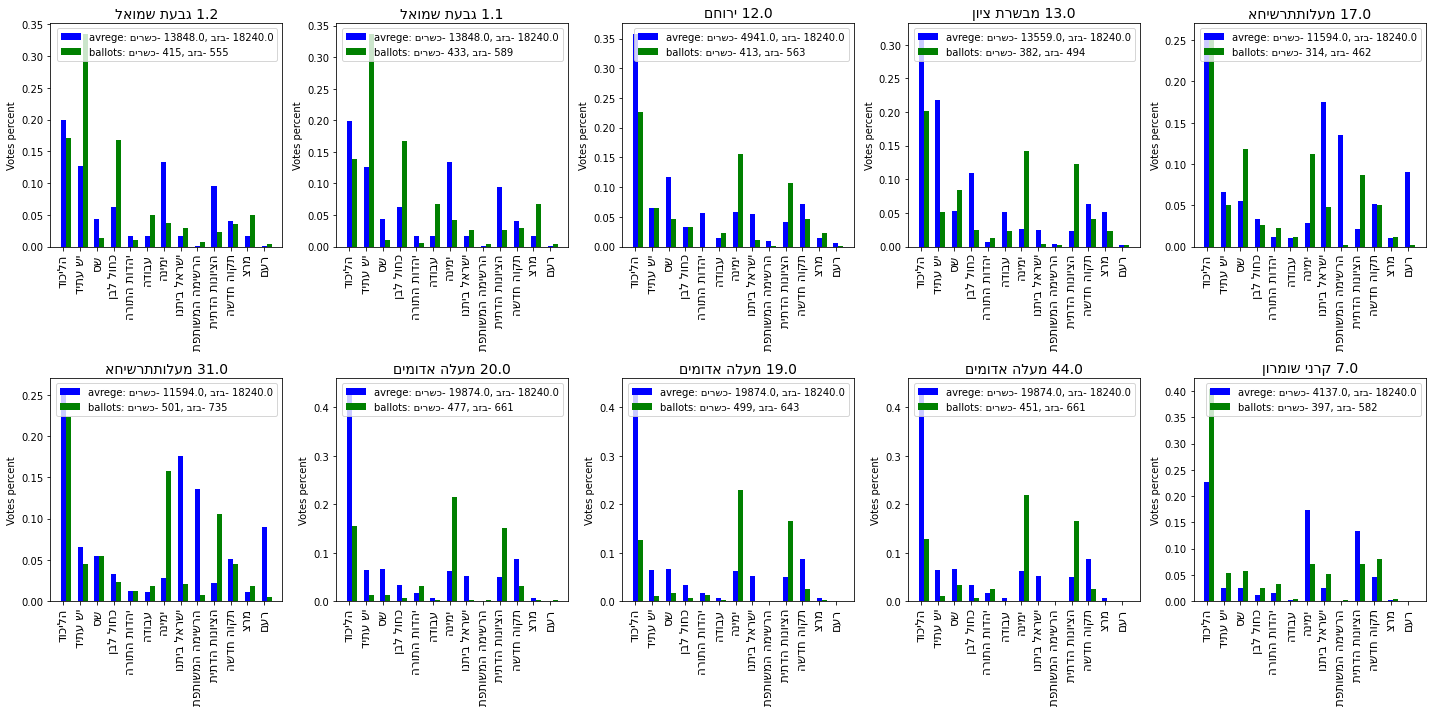

In [ ]:
bar_plot_compare_to_avrege(ballots_2020_for_f,averge_2020_for_f_mahalanobis, top_mahalanobis_2020)

***It can be observed that according to the manner of change of the distribution of votes in the ballot box which differs from the average in the city is radically different with respect to the corresponding section from the previous question. Which is widely understood in the wake of the current realization that works according to correlation, so the changes are more understandably explained.***

***2.b: repeat section 1.c for mahalanobis distance.***

---

In [ ]:
ballots_2020.rename(columns=parties_dict_2021, inplace=True)
ballots_2021['mahalanobis_to_2020'] = mahalanobis(x=ballots_2021.iloc[:,3:],data= ballots_2020.iloc[:,3:],cov=covv)
largest_mahalanobis_dist = ballots_2021.nlargest(10,'mahalanobis_to_2020').index
largest_mahalanobis_dist

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MultiIndex([(1.0, 1374),
            (1.0, 1369),
            (1.0, 3579),
            (1.0, 3822),
            (1.0, 3658),
            (1.0, 1368),
            (1.0, 3744),
            (1.0, 3657),
            (1.0, 3724),
            (1.0, 1364)],
           names=['קלפי', 'סמל ישוב'])

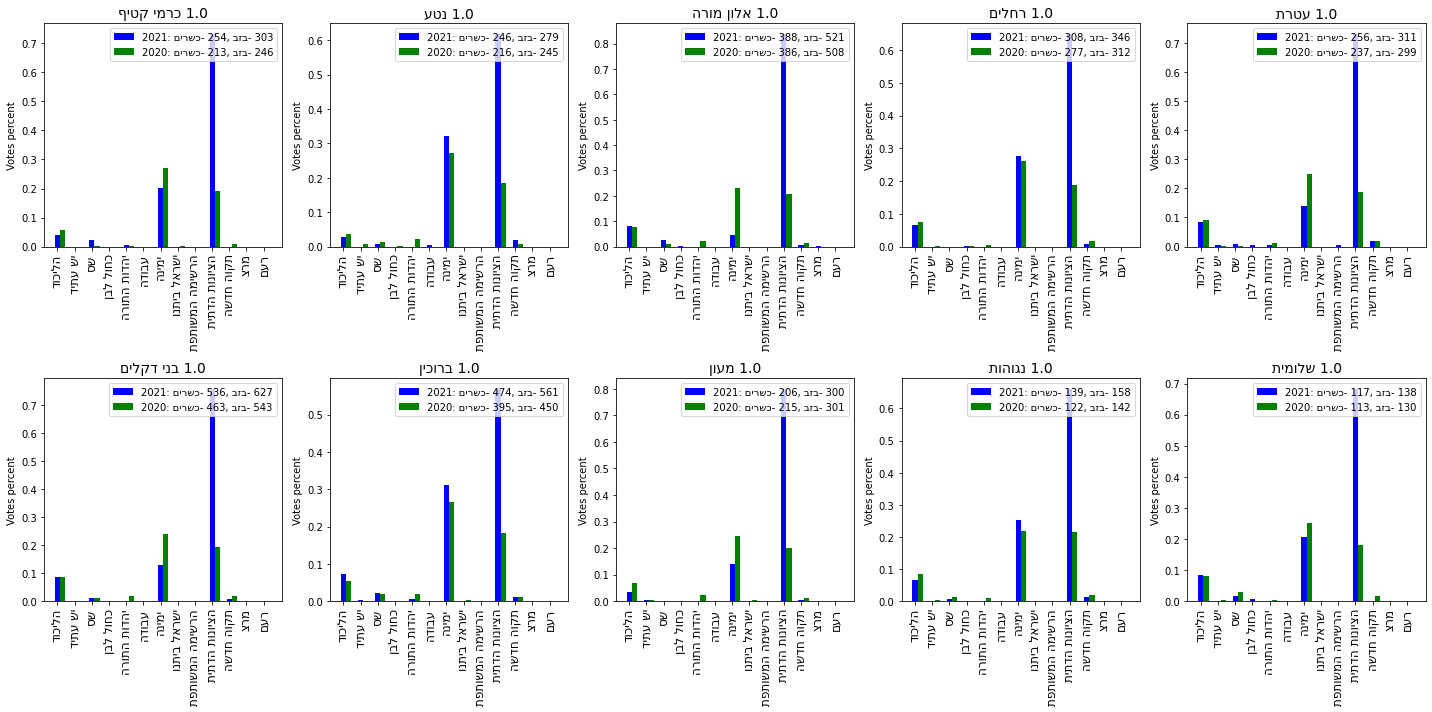

In [ ]:
def bar_plot2(ballots_2020, ballots_2021, top):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  votes_2020 = ballots_2020.loc[top]  # total votes for each party
  votes_2021 = ballots_2021.loc[top]

  names = votes_2020.iloc[:,3:].keys()
  rev_names = [name[::-1] for name in names]
  n = 13

  for i in range(10):
    bar_2020 = ax[i//5, i%5].bar(np.arange(n)+width, list(votes_2020.iloc[i,3:]), width, color='g')
    bar_2021 = ax[i//5, i%5].bar(np.arange(n), list(votes_2021.iloc[i,3:]), width, color='b')
    ax[i//5, i%5].set_title(ballots_2020.loc[top[i], 'שם ישוב'][::-1] + " " + str(top[i][0]) , fontsize=14)

    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 90 ,fontsize=12)
    ax[i//5, i%5].legend((bar_2021[0], bar_2020[0]), ('2021: ' + 'םירשכ- '+ str(ballots_2021.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots_2021.loc[top[i], 'בזב']),
                                                      '2020: ' + 'םירשכ- '+ str(ballots_2020.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots_2020.loc[top[i], 'בזב'])))

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()

bar_plot2(ballots_2020,ballots_2021.drop('mahalanobis_to_2020',axis=1),largest_mahalanobis_dist)

***It is clear to see that the top 10 list of parties has changed after we apllied the mahalanobis distance. However, still 7 out of 10 parties (1b 2020) are still in the list and kept the order, therefore the changes can't be considered dramatic.***

***On the opposite, in 2021 we can observe dramatic changes comparing to 1b: the 1st place from 1b did not appear in mahalanobis plots at all; 4 ballots from "עכו" were bizzare with the 1b measure, however they dont appear here. 
That is why, we conclude that this two types of measurment present different voting patterns.***

***In the last case, it is clear that in 1c most of bizzare ballots were represented from Arab cities, while here they are represented from Jewish cities.***

***That is why, we conclude that this two types of measurment present different voting patterns.***
